<img src="../../img/python-logo-no-text.svg"
     style="display:block;margin:auto;width:10%"/>
<br>
<div style="text-align:center; font-size:200%;">
  <b>Pandas Series</b>
</div>
<br/>
<div style="text-align:center;">Dr. Matthias Hölzl</div>
<br/>
<div style="text-align:center;">module_610_pandas/topic_110_pandas_series</div>


# Pandas Typ `Series`

Eine Pandas `Series` Instanz stellt eine Folge von Werten dar, ähnlich wie
eine Python-Liste. Die Elemente einer Serie können über ihren numerischen
Index abgerufen werden, aber zusätzlich kann eine Serie einen semantisch
sinnvollen Index haben (z. B. für Zeitreihen).

Intern wird eine Pandas-Serie durch ein Numpy-Array unterstützt, daher sind
die meisten der Numpy-Operationen auch auf Serien anwendbar sind.

Darüber hinaus ist es einfach (und billig), Serien nach Numpy zu konvertieren.

In [1]:
import numpy as np
import pandas as pd

## Erzeugung

### Aus Listen

In [2]:
pd.Series(data=[10, 20, 30, 40])

0    10
1    20
2    30
3    40
dtype: int64

In [3]:
pd.Series(["a", "b"])

0    a
1    b
dtype: object

### Aus Listen mit Index

In [5]:
pd.Series(data=[1, 2, 3, 4], index=["w", "x", "y", "z"])

w    1
x    2
y    3
z    4
dtype: int64

### Aus Range oder Iterable

In [6]:
pd.Series(data=range(1, 201, 2))

0       1
1       3
2       5
3       7
4       9
     ... 
95    191
96    193
97    195
98    197
99    199
Length: 100, dtype: int64

In [8]:
data = pd.Series(data=range(1, 201, 2))
data.head(3)

0    1
1    3
2    5
dtype: int64

In [9]:
data.tail()

95    191
96    193
97    195
98    197
99    199
dtype: int64

### Aus Dictionary

## Indizes und Operationen

In [10]:
food1 = pd.Series({"Ice Cream": 2.49, "Cake": 4.99, "Fudge": 7.99})
food2 = pd.Series({"Cake": 4.99, "Ice Cream": 3.99, "Pie": 3.49, "Cheese": 1.99})
food1

Ice Cream    2.49
Cake         4.99
Fudge        7.99
dtype: float64

In [11]:
food1.index

Index(['Ice Cream', 'Cake', 'Fudge'], dtype='object')

In [12]:
food1.size

3

In [13]:
food1.sum()

15.47

In [14]:
food1.mean()

5.156666666666667

In [16]:
food1.name is None

True

In [17]:
food1.name = "Deserts"

In [18]:
food1.name

'Deserts'

In [19]:
food1

Ice Cream    2.49
Cake         4.99
Fudge        7.99
Name: Deserts, dtype: float64

<AxesSubplot:>

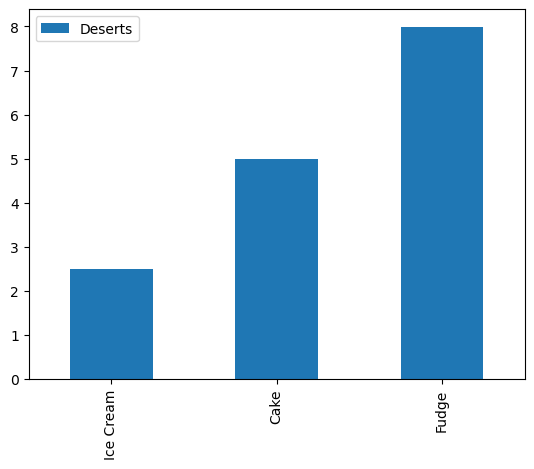

In [21]:
food1.plot.bar(legend=True)

In [24]:
import random
data = pd.Series(data=np.random.normal(loc=0.0, scale=10.0, size=(2000,)))
data

0        5.626491
1       -0.217157
2        1.881377
3        7.949069
4       16.113372
          ...    
1995     8.309918
1996   -19.036412
1997    -4.028754
1998     9.548654
1999     1.958150
Length: 2000, dtype: float64

<AxesSubplot:ylabel='Frequency'>

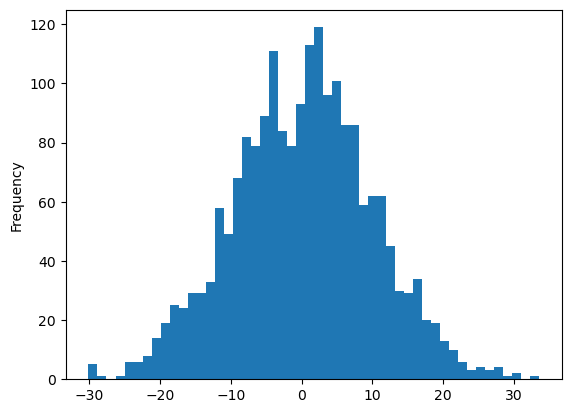

In [27]:
data.plot.hist(bins=50)

In [28]:
food1["Cake"]

4.99

In [29]:
food1.loc["Cake"]

4.99

In [30]:
food1.index

Index(['Ice Cream', 'Cake', 'Fudge'], dtype='object')

In [32]:
# food1["Pie"]

In [33]:
food1[0]

2.49

In [34]:
food1.iloc[0]

2.49

In [35]:
confusing = pd.Series(data=np.linspace(0, 5, 11), index=np.arange(-5, 6))
confusing

-5    0.0
-4    0.5
-3    1.0
-2    1.5
-1    2.0
 0    2.5
 1    3.0
 2    3.5
 3    4.0
 4    4.5
 5    5.0
dtype: float64

In [36]:
confusing[0]

2.5

In [37]:
confusing.loc[0]

2.5

In [38]:
confusing.iloc[0]

0.0

In [39]:
food_sum = food1 + food2
food_sum

Cake         9.98
Cheese        NaN
Fudge         NaN
Ice Cream    6.48
Pie           NaN
dtype: float64

In [40]:
food_sum.dropna()

Cake         9.98
Ice Cream    6.48
dtype: float64

In [41]:
def discount(price):
    return price * 0.9

In [42]:
food1.apply(discount)

Ice Cream    2.241
Cake         4.491
Fudge        7.191
Name: Deserts, dtype: float64

In [43]:
food1

Ice Cream    2.49
Cake         4.99
Fudge        7.99
Name: Deserts, dtype: float64

In [46]:
food1.apply(discount)

Ice Cream    2.241
Cake         4.491
Fudge        7.191
Name: Deserts, dtype: float64

In [47]:
all_food = pd.concat([food1, food2])

In [48]:
all_food

Ice Cream    2.49
Cake         4.99
Fudge        7.99
Cake         4.99
Ice Cream    3.99
Pie          3.49
Cheese       1.99
dtype: float64

In [49]:
all_food.is_unique

False

In [50]:
all_food["Cake"]

Cake    4.99
Cake    4.99
dtype: float64

In [53]:
unique_food = all_food.groupby(all_food.index).max()
unique_food

Cake         4.99
Cheese       1.99
Fudge        7.99
Ice Cream    3.99
Pie          3.49
dtype: float64

In [54]:
unique_food.is_unique

True

### Mehrfach vorkommende Index-Werte

In [ ]:
type(all_food["Pie"])

### Sortierte und unsortierte Indizes

In [ ]:
# all_food['Cake':'Fudge']


**Wichtig:** Der ober Wert der Slice, `"Fudge"` ist im Resultat enthalten!

## Fehlende Werte